In [294]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
os.chdir('/Users/naitochieri/Downloads') 
chipotle = pd.read_excel('Chipotle.xlsx')
df = pd.DataFrame(chipotle)
df.head(20)

,top1,wom,sm,walk,billboard,patronage,importantconvenience,importantvariety,importantprice,importanthealthy,...,chipotlehealthy,chipotletaste,chipotleambience,female,age,income,plan,spending,buylocal,healthyimportanttome
0,In-n-out,0.0,0.0,1.0,0.0,0.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,0.0,52.0,20942.0,3.0,3.0,2.0,1.0
1,Chick-Fil-A,0.0,0.0,1.0,0.0,1.0,5.0,3.0,5.0,2.0,...,4.0,4.0,4.0,0.0,35.0,24330.0,3.0,2.0,NaN,3.0
2,Chipotle,1.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,4.0,3.0,4.0,0.0,37.0,41052.0,2.0,2.0,2.0,2.0
3,Chipotle,0.0,0.0,1.0,0.0,0.0,5.0,4.0,5.0,5.0,...,5.0,5.0,5.0,0.0,33.0,86277.0,2.0,3.0,2.0,2.0
4,Panera,0.0,0.0,0.0,0.0,2.0,4.0,4.0,5.0,5.0,...,4.0,4.0,3.0,0.0,49.0,54651.0,1.0,4.0,2.0,2.0
5,Chick-Fil-A,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,...,4.0,4.0,4.0,0.0,21.0,58742.0,2.0,4.0,2.0,2.0
6,Chipotle,0.0,0.0,0.0,0.0,1.0,5.0,4.0,5.0,5.0,...,5.0,5.0,4.0,0.0,24.0,58416.0,1.0,4.0,2.0,1.0
7,KFC,1.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,5.0,...,5.0,5.0,5.0,0.0,25.0,29001.0,1.0,2.0,1.0,1.0
8,Chick-Fil-A,1.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,...,5.0,5.0,4.0,0.0,31.0,40076.0,2.0,2.0,2.0,2.0
9,Chick-Fil-A,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
# drop outcome or marketing mix question
df = df.drop(['wom','sm','walk','billboard','chipotlehealthy','chipotletaste','chipotleambience', 'chipotleconvenient', 'chipotlevariety', 'chipotleprice'], axis = 1)
df

,top1,patronage,importantconvenience,importantvariety,importantprice,importanthealthy,importanttaste,importantambience,female,age,income,plan,spending,buylocal,healthyimportanttome
0,In-n-out,0.0,5.0,4.0,5.0,5.0,5.0,5.0,0.0,52.0,20942.0,3.0,3.0,2.0,1.0
1,Chick-Fil-A,1.0,5.0,3.0,5.0,2.0,5.0,4.0,0.0,35.0,24330.0,3.0,2.0,NaN,3.0
2,Chipotle,0.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,37.0,41052.0,2.0,2.0,2.0,2.0
3,Chipotle,0.0,5.0,4.0,5.0,5.0,5.0,4.0,0.0,33.0,86277.0,2.0,3.0,2.0,2.0
4,Panera,2.0,4.0,4.0,5.0,5.0,5.0,4.0,0.0,49.0,54651.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89076.0,NaN,NaN,NaN,NaN
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
# count missing values for each columns
df.isnull().sum()

top1                     5
patronage                4
importantconvenience    24
importantvariety        29
importantprice          28
importanthealthy        27
importanttaste          30
importantambience       27
female                  19
age                     18
income                  18
plan                    19
spending                21
buylocal                22
healthyimportanttome    21
dtype: int64

In [267]:
# impute the numerical missing value with their means and drop rows with missing categorical variables
#df.fillna(df.mean(), inplace=True)
#df.dropna(inplace=True)
#df.isnull().sum()

In [279]:
# convert object to numerical value
df2 = pd.get_dummies(df, columns=["top1"])
df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df2.isnull().sum()

#standardize the data to normal distribution
#from sklearn import preprocessing
#df_st = preprocessing.scale(df2)
#df_st = pd.DataFrame(df_st)
#df_st

patronage               0
importantconvenience    0
importantvariety        0
importantprice          0
importanthealthy        0
importanttaste          0
importantambience       0
female                  0
age                     0
income                  0
plan                    0
spending                0
buylocal                0
healthyimportanttome    0
top1_Applebees          0
top1_Arbys              0
top1_Chick-Fil-A        0
top1_Chipotle           0
top1_El Pollo Loco      0
top1_Eppies             0
top1_In-n-out           0
top1_Jason's Deli       0
top1_KFC                0
top1_Martins            0
top1_McDonalds          0
top1_Outback            0
top1_Panera             0
top1_Pizza Hut          0
top1_Pizza express      0
top1_Starbucks          0
top1_Subway             0
top1_Taco Bell          0
top1_The Market         0
top1_Wendy's            0
top1_arbys              0
top1_burger king        0
top1_panera             0
dtype: int64

In [280]:
#from sklearn import preprocessing
#df_st = preprocessing.scale(df_normalize)
#df_st = pd.DataFrame(df_normalize)
#df_st.head()

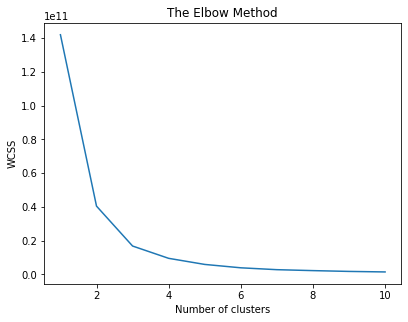

In [287]:
# scree plot to decide the number of clusters using elbow method
plt.figure(figsize=(6.4, 4.8)) #size of the plot
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within-cluster sums of squares = distance
plt.show()

In [288]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2)

In [289]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans + 1

In [290]:
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1, columns = ['cluster'])
cluster.head(20)

,cluster
0,2
1,2
2,1
3,1
4,1
5,1
6,2
7,2
8,2
9,2


In [291]:
# Adding cluster to the Dataset1
df2['cluster'] = cluster
cluster

,cluster
0,2
1,2
2,1
3,1
4,1
...,...
316,2
317,1
318,2
319,1


In [292]:
# Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(df2.groupby('cluster').mean(),1))
kmeans_mean_cluster
# Since there are too many dimentionality, the clusters cannot be plotted 

,patronage,importantconvenience,importantvariety,importantprice,importanthealthy,importanttaste,importantambience,female,age,income,...,top1_Pizza Hut,top1_Pizza express,top1_Starbucks,top1_Subway,top1_Taco Bell,top1_The Market,top1_Wendy's,top1_arbys,top1_burger king,top1_panera
cluster,,,,,,,,,,,,,,,,,,,,,
1.0,0.4,4.5,4.2,4.6,4.4,4.9,4.2,0.3,41.6,41160.6,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.4,4.5,4.3,4.7,4.6,4.9,4.2,0.2,40.0,41251.1,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
kmeans_mean_cluster.to_excel('/Users/naitochieri/Desktop/clusters.xlsx')

In [210]:
######################################################
# secound round, this time only health related columns
######################################################
X = df2.drop(['importanthealthy'], axis = 1)
y = df2['importanthealthy']

In [211]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans + 1
cluster2 = pd.DataFrame(y_kmeans1, columns = ['cluster2'])
cluster2.head(20)

,cluster2
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,1
8,1
9,1


In [212]:
df2['cluster2'] = cluster2

# Mean of clusters
kmeans_mean_cluster2 = pd.DataFrame(round(df2.groupby('cluster2').mean(),1))
kmeans_mean_cluster2

,patronage,importantconvenience,importantvariety,importantprice,importanthealthy,importanttaste,importantambience,female,age,income,...,top1_Pizza express,top1_Starbucks,top1_Subway,top1_Taco Bell,top1_The Market,top1_Wendy's,top1_arbys,top1_burger king,top1_panera,cluster
cluster2,,,,,,,,,,,,,,,,,,,,,
1,0.5,4.6,4.4,4.8,4.6,4.9,4.2,0.2,38.6,29086.7,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.6
2,0.4,4.3,4.2,4.4,4.3,4.9,4.2,0.2,44.0,66907.7,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [209]:
kmeans_mean_cluster2.to_excel('/Users/naitochieri/Desktop/clusters2.xlsx')